# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
       # city_weather = # YOUR CODE HERE
            
    
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request
            
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        city_pressure = city_weather.get("main", {}).get("pressure")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Pressure": city_pressure,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # sleep
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | le port
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | la sarre
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | siwa oasis
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | gulf shores
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | tvoroyri
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | sabang
Processing Record 19 of Set 1 | ishimbay
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | dickinson
Processing Record 23 of Se

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          608
Lat           580
Lng           580
Max Temp      580
Humidity      580
Pressure      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,le port,-20.9373,55.2919,71.60,73.0,1022.0,77.0,3.29,RE,1.717263e+09
1,adamstown,-25.0660,-130.1015,69.73,68.0,1015.0,82.0,11.21,PN,1.717263e+09
2,ilulissat,69.2167,-51.1000,33.82,60.0,1013.0,40.0,5.75,GL,1.717263e+09
3,bethel,41.3712,-73.4140,83.35,38.0,1019.0,0.0,8.05,US,1.717263e+09
4,port-aux-francais,-49.3500,70.2167,36.21,74.0,984.0,20.0,46.28,TF,1.717263e+09


In [11]:
city_data_df.info

<bound method DataFrame.info of                         City      Lat       Lng  Max Temp  Humidity  Pressure  \
City_ID                                                                         
0                    le port -20.9373   55.2919     71.60      73.0    1022.0   
1                  adamstown -25.0660 -130.1015     69.73      68.0    1015.0   
2                  ilulissat  69.2167  -51.1000     33.82      60.0    1013.0   
3                     bethel  41.3712  -73.4140     83.35      38.0    1019.0   
4          port-aux-francais -49.3500   70.2167     36.21      74.0     984.0   
...                      ...      ...       ...       ...       ...       ...   
603      phan rang-thap cham  11.5667  108.9833     81.37      81.0    1010.0   
604               malumfashi  11.7853    7.6218     89.65      38.0    1009.0   
605             bandar abbas  27.1865   56.2808     94.98      52.0    1000.0   
606                  manggar  -2.8833  108.2667     80.71      83.0    1011.0

In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,le port,-20.9373,55.2919,71.60,73.0,1022.0,77.0,3.29,RE,1.717263e+09
1,adamstown,-25.0660,-130.1015,69.73,68.0,1015.0,82.0,11.21,PN,1.717263e+09
2,ilulissat,69.2167,-51.1000,33.82,60.0,1013.0,40.0,5.75,GL,1.717263e+09
3,bethel,41.3712,-73.4140,83.35,38.0,1019.0,0.0,8.05,US,1.717263e+09
4,port-aux-francais,-49.3500,70.2167,36.21,74.0,984.0,20.0,46.28,TF,1.717263e+09


In [10]:
city_data_df.info

<bound method DataFrame.info of                         City      Lat       Lng  Max Temp  Humidity  Pressure  \
City_ID                                                                         
0                    le port -20.9373   55.2919     71.60      73.0    1022.0   
1                  adamstown -25.0660 -130.1015     69.73      68.0    1015.0   
2                  ilulissat  69.2167  -51.1000     33.82      60.0    1013.0   
3                     bethel  41.3712  -73.4140     83.35      38.0    1019.0   
4          port-aux-francais -49.3500   70.2167     36.21      74.0     984.0   
...                      ...      ...       ...       ...       ...       ...   
603      phan rang-thap cham  11.5667  108.9833     81.37      81.0    1010.0   
604               malumfashi  11.7853    7.6218     89.65      38.0    1009.0   
605             bandar abbas  27.1865   56.2808     94.98      52.0    1000.0   
606                  manggar  -2.8833  108.2667     80.71      83.0    1011.0

In [12]:
city_data_df.loc[pd.isnull(city_data_df.Lat)]

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
23,mulifanua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,vingt cinq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,shangri-la,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,kokofata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,kataragama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,muzayri',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,sonsorol village,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,'ohonua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
city_data_clean = city_data_df.dropna(how="any").reset_index()

city_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     574 non-null    int64  
 1   City        574 non-null    object 
 2   Lat         574 non-null    float64
 3   Lng         574 non-null    float64
 4   Max Temp    574 non-null    float64
 5   Humidity    574 non-null    float64
 6   Pressure    574 non-null    float64
 7   Cloudiness  574 non-null    float64
 8   Wind Speed  574 non-null    float64
 9   Country     574 non-null    object 
 10  Date        574 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 49.5+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

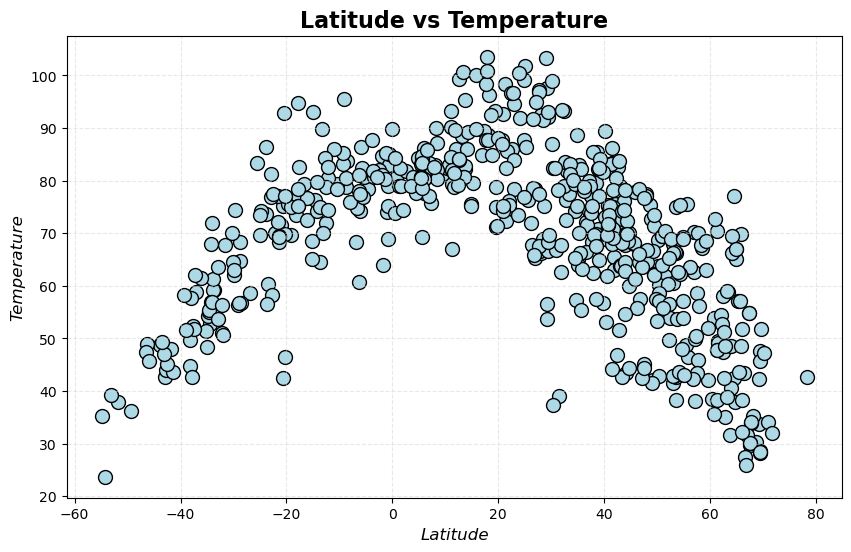

In [21]:
# Build scatter plot for latitude vs. temperature
# Step 1: Get the Data
x = city_data_clean.Lat
y = city_data_clean["Max Temp"]

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="lightblue", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
plt.savefig("../output_data/Fig1.png")
plt.show()




#### Latitude Vs. Humidity

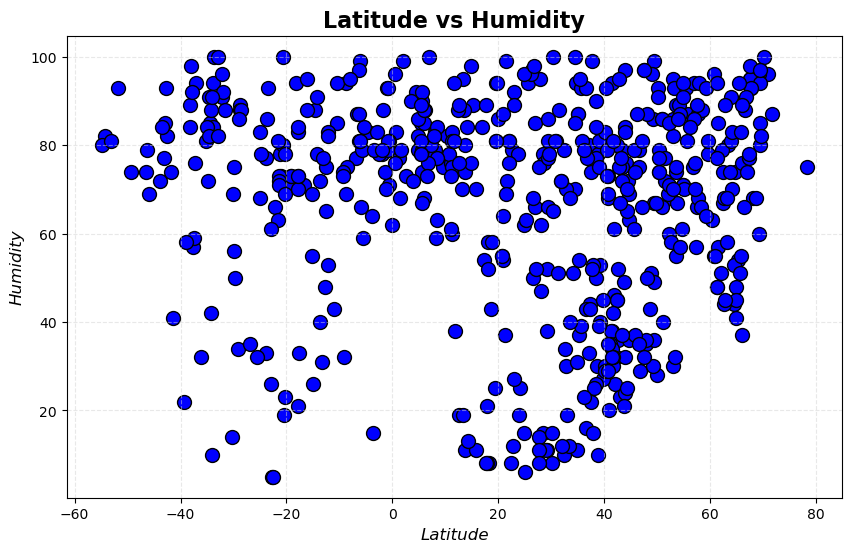

In [23]:
# Build the scatter plots for latitude vs. humidity
# Step 1: Get the Data
x = city_data_clean.Lat
y = city_data_clean.Humidity

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="blue", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

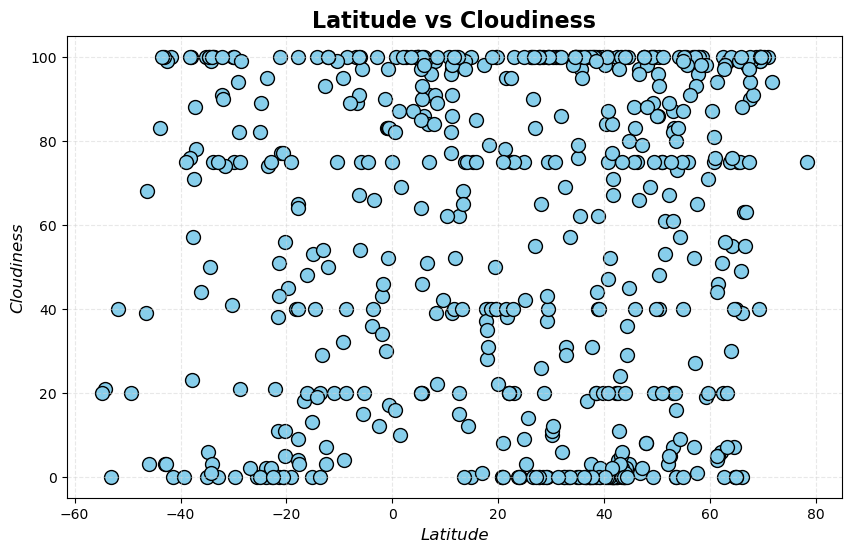

In [24]:
# Build the scatter plots for latitude vs. cloudiness
# Step 1: Get the Data
x = city_data_clean.Lat
y = city_data_clean.Cloudiness

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="skyblue", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

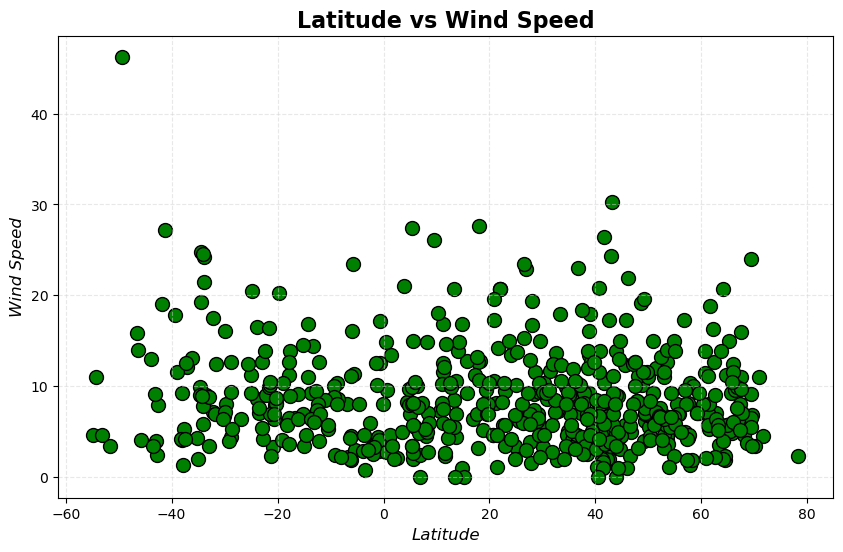

In [27]:
# Build the scatter plots for latitude vs. wind speed
# Step 1: Get the Data

x = city_data_clean.Lat
y = city_data_clean["Wind Speed"]

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="green", edgecolor="black", s=100)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [77]:
# Define a function to create Linear Regression plots

def doRegression(x_value, y_values, x_title, y_title, annotation_pos):
    # USING LINREGRESS
    
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))
    
    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="skyblue", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_clean.loc[city_data_clean.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
2,2,ilulissat,69.2167,-51.1000,33.82,60.0,1013.0,40.0,5.75,GL,1.717263e+09
3,3,bethel,41.3712,-73.4140,83.35,38.0,1019.0,0.0,8.05,US,1.717263e+09
5,5,talnakh,69.4865,88.3972,28.20,97.0,1007.0,100.0,6.76,RU,1.717263e+09
8,8,la sarre,48.8002,-79.1996,72.72,51.0,1015.0,100.0,10.11,CA,1.717263e+09
9,9,tura,25.5198,90.2201,76.32,94.0,1006.0,14.0,6.11,IN,1.717263e+09


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_clean.loc[city_data_clean.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,0,le port,-20.9373,55.2919,71.60,73.0,1022.0,77.0,3.29,RE,1.717263e+09
1,1,adamstown,-25.0660,-130.1015,69.73,68.0,1015.0,82.0,11.21,PN,1.717263e+09
4,4,port-aux-francais,-49.3500,70.2167,36.21,74.0,984.0,20.0,46.28,TF,1.717263e+09
6,6,waitangi,-43.9535,-176.5597,48.81,72.0,1012.0,83.0,13.00,NZ,1.717263e+09
7,7,hermanus,-34.4187,19.2345,52.81,85.0,1022.0,50.0,19.22,ZA,1.717263e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5494902169415362


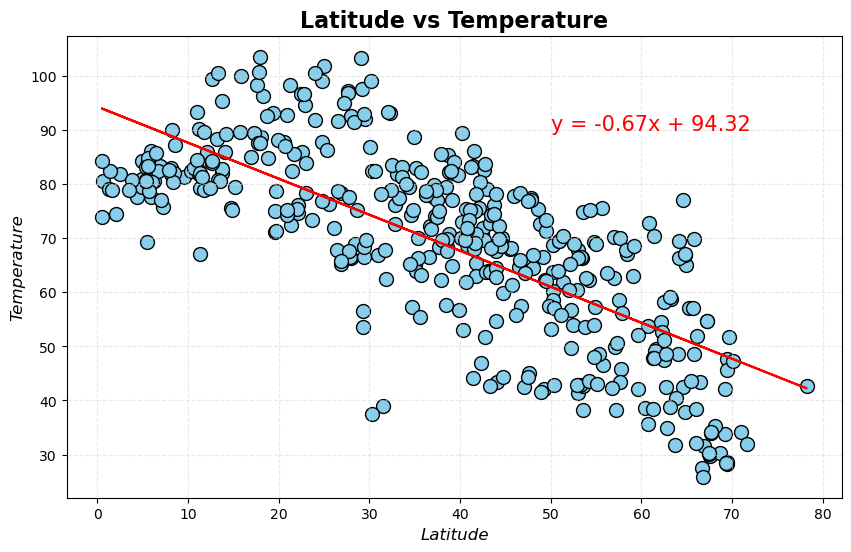

In [78]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]

doRegression(x_values, y_values, "Latitude", "Temperature", (50,90))

The r-squared is: 0.6790889338226124


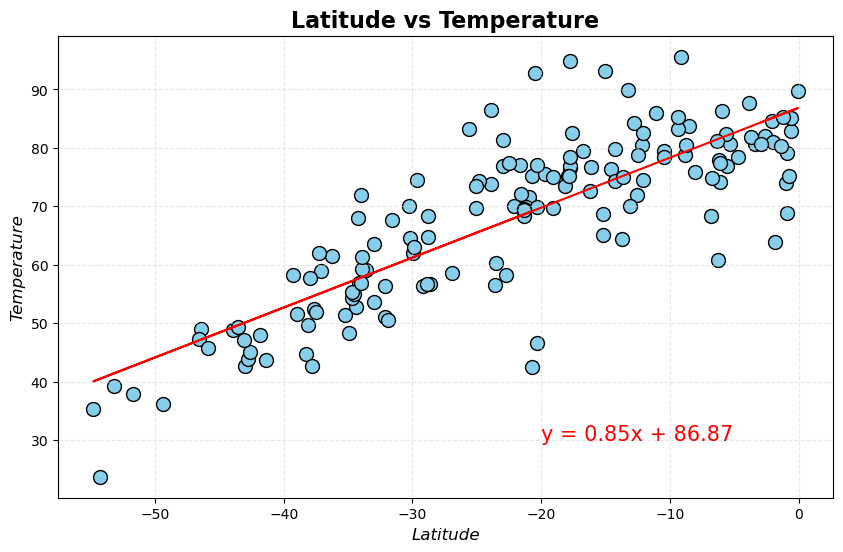

In [79]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]

doRegression(x_values, y_values, "Latitude", "Temperature", (-20,30))

**Discussion about the linear relationship:** As we move further from the equator temperature decreases

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0021070289940034233


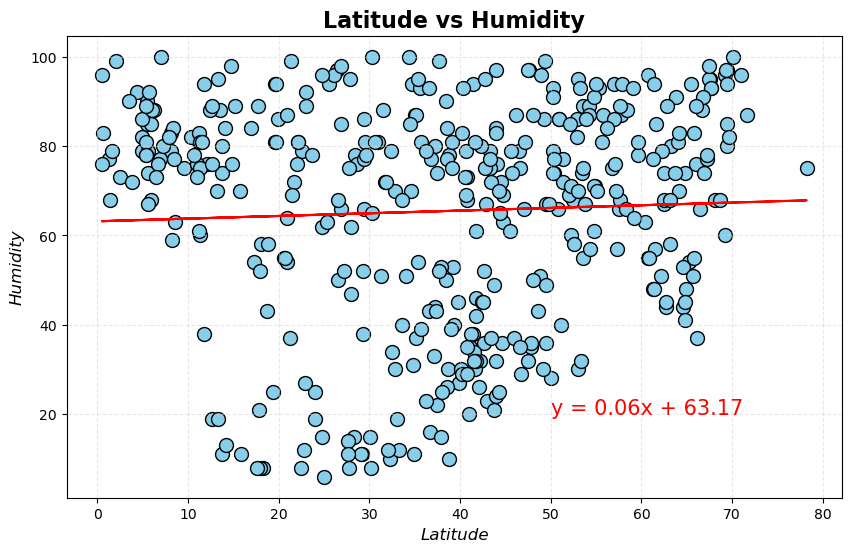

In [80]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Humidity

doRegression(x_values, y_values, "Latitude", "Humidity", (50,20))

The r-squared is: 0.00034505996774865816


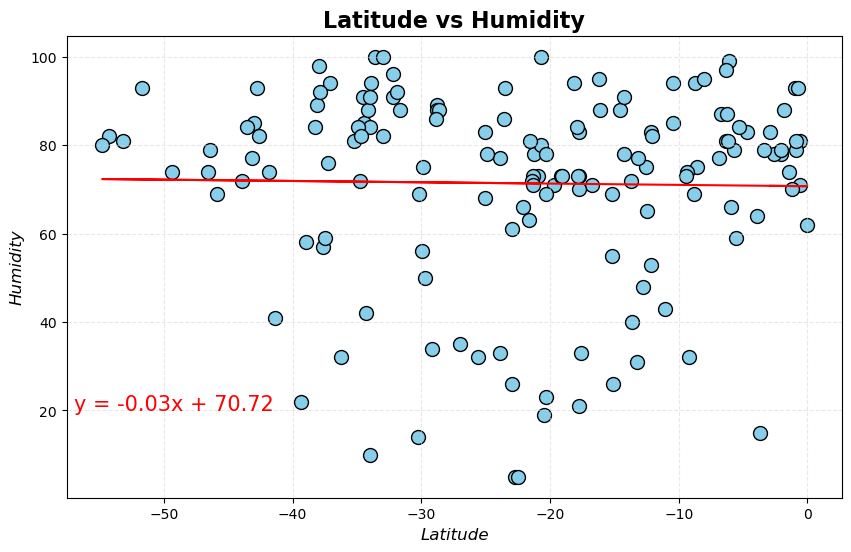

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Humidity

doRegression(x_values, y_values, "Latitude", "Humidity", (-57,20))

**Discussion about the linear relationship:** Latitude and Humidity do not seem to have very much of a relationship with humidity remaining between about 60 and 70 percent at any given location.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.00013848307069488127


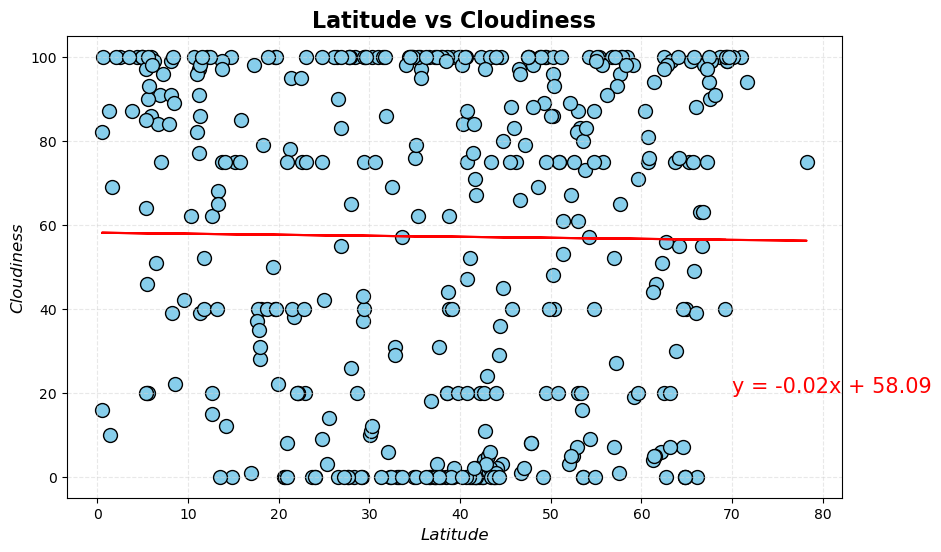

In [82]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df.Cloudiness

doRegression(x_values, y_values, "Latitude", "Cloudiness", (70,20))

The r-squared is: 0.0018424825278076592


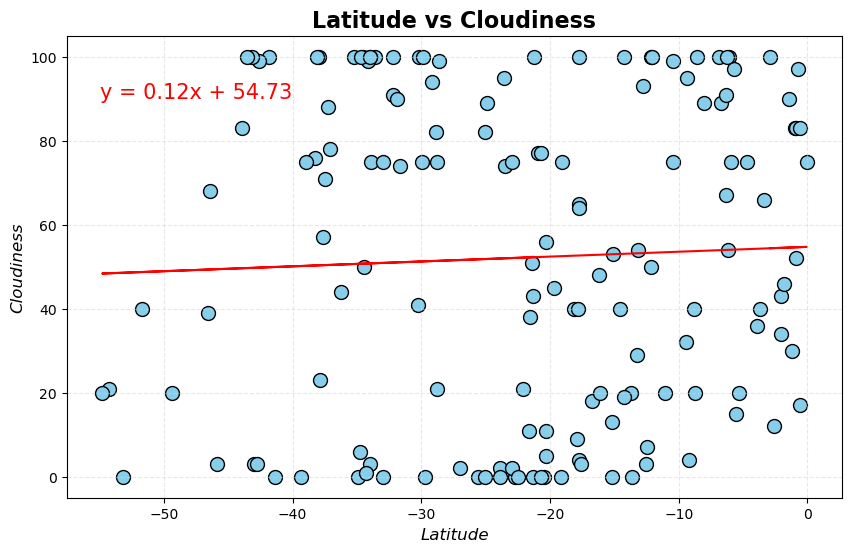

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df.Cloudiness

doRegression(x_values, y_values, "Latitude", "Cloudiness", (-55,90))

**Discussion about the linear relationship:** Latitude and cloudiness do not seem to have very much of a relationship either.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.006023600098902196


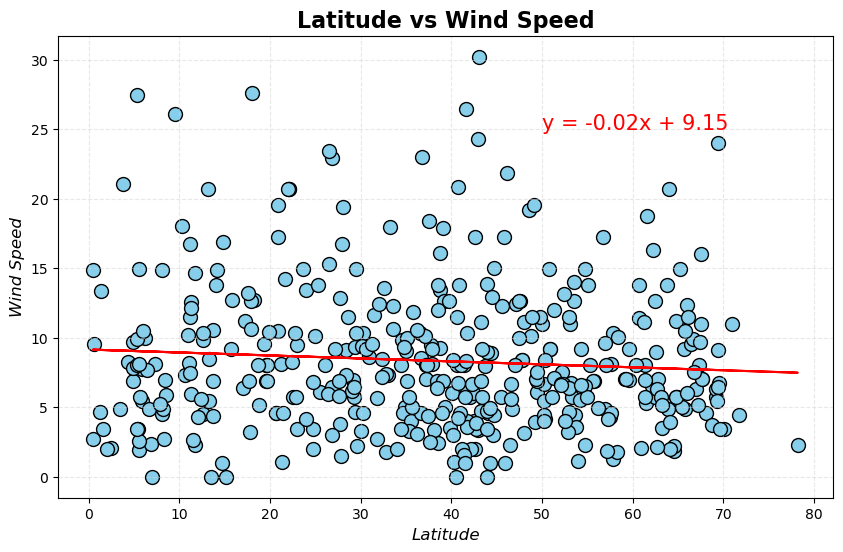

In [84]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]

doRegression(x_values, y_values, "Latitude", "Wind Speed", (50,25))

The r-squared is: 0.05918628720420333


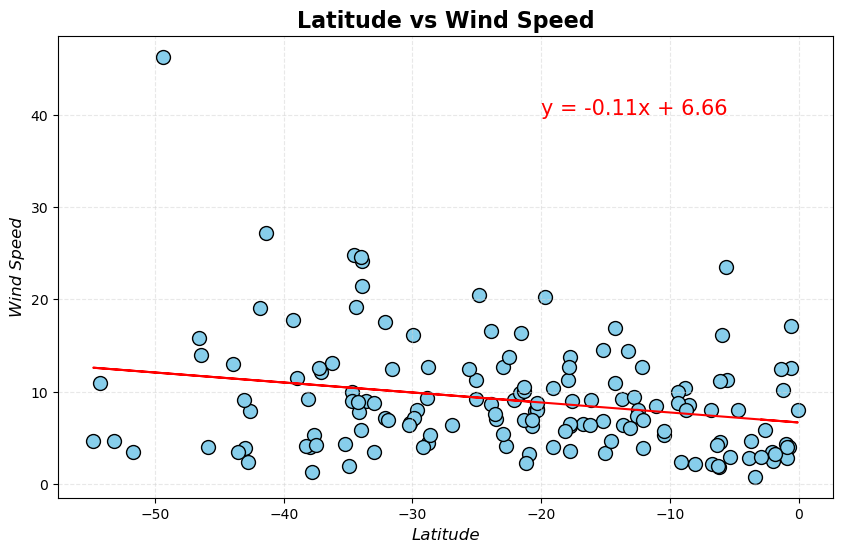

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]

doRegression(x_values, y_values, "Latitude", "Wind Speed", (-20,40))

**Discussion about the linear relationship:** Wind speed also does not have very much relationship as the change in speed is very minimal regardless of latitude. 